In [4]:
# we followed the code in:
#https://towardsdatascience.com/a-complete-logistic-regression-algorithm-from-scratch-in-python-step-by-step-ce33eae7d703
import pandas as pd
import numpy as np

In [5]:
# We used the Heart.csv dataset provided by Kaggle
df = pd.read_csv('Heart.csv')
df.head()
# The output column denotes if the person has a Heart Disease or not 1-NO 0-YES
# Esta al revez en toward data science, usan 1 yes 0 no

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# sigmoid function
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001 # the final small value is to make sure the log is never 0

In [7]:
# cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [8]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [9]:
# Prediction
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [10]:
# we introduce one extra column for the bias
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)

In [15]:
# Define input and output
X = df.drop(columns=["thall"])
y= df["output"]

In [16]:
# Get Accuracy
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

<ipython-input-7-0bea681e0129>:4: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [17]:
acc

0.801980198019802

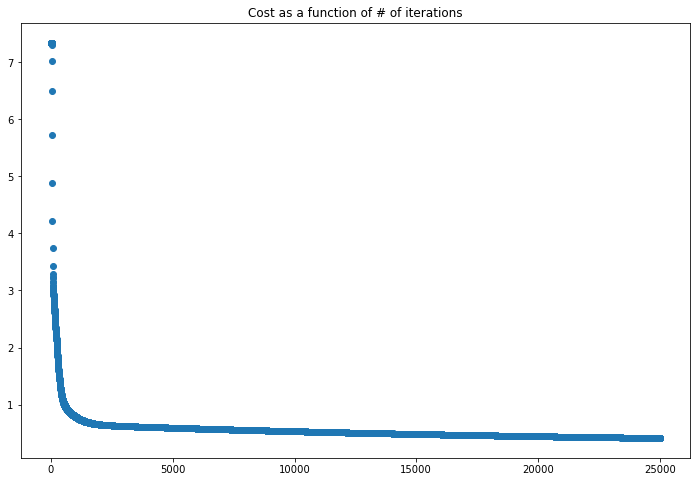

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.title("Cost as a function of # of iterations")
plt.show()